## Understand about the host

Sanyanam Bhutani is the host of Chai time datascience. Let's look at some of the key aspects of things which Sanyanam Bhutani likes about his conversation


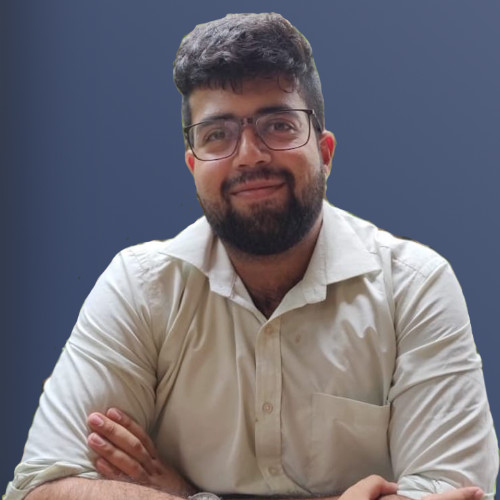

- Birthday
- Word count of best viewed speakers vs Host
- No of times Sanyanam talked vs host
- Sanyanam makes ha ha sounds etc...
- Features of Most viewed episode(not merely word clouds)
- Word Clouds of most viewed episodes


## Acknowledgments

- https://www.kaggle.com/aashita/word-clouds-of-various-shapes

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import re

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

In [ ]:
import os
os.listdir('../input/')

In [ ]:
episode = pd.read_csv('../input/chai-time-data-science/Episodes.csv')
desc = pd.read_csv('../input/chai-time-data-science/Description.csv')

In [ ]:
episode.describe()

<div class=h3> Happy birtday host</div>

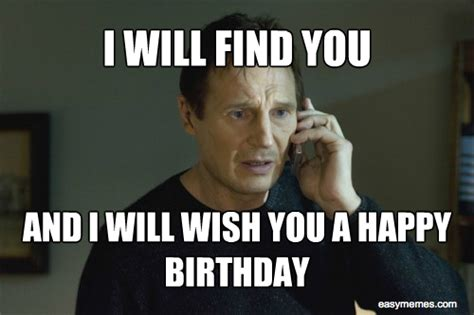

- Sanyanam conduct a special Ask me anything episode on his birthay, on finding that episode. We are able to see his birthay is 27th May.
- Our host said he had turned into ago of 23 during that episode. So his DOB is: (27/05/1997)

In [ ]:
episode[episode['episode_id']=="E69"]["release_date"]

In [ ]:
def extract_transcript(fn, save=False, save_path=''):
    "Takes transcript and converts it to `DataFrame`"
    pat = r'([A-Za-z]|\s+)\s([0-9]{0,2}:{0,1}[0-9]{1,2}:[0-9][0-9])'
    f = open(fn, "r")
    t = True
    df = pd.DataFrame(columns = ['Time', 'Speaker', 'Text'])
    i = 0
    first = True
    while t:
        line = f.readline()
        if line == '': t = False
        i += 1
        line = re.split(pat, line[:-1])
        if len(line) == 4:
            is_new = 1
            speak = line[0]
            time = line[2]
        while is_new == 1:
            if first:
                line = f.readline()
                for i in range(6):
                    l_c = f.readline()
                    if speak not in l_c and time not in l_c:
                        line += l_c
                i += 1
                first = False
            else:
                line = f.readline()
                i += 1
            if len(line) > 2 and line != '\n':
                line = line[:-1]
                df.loc[i] = [time, speak, line]
                df.reset_index()
            else:
                is_new = 0
    df.reset_index(drop=True, inplace=True)
    df['Text'] = df['Text'].replace('\n', '')
    if save:
        df.to_csv(save_path+fn.name[:-3] + 'csv', index=False, sep='|')
    return df


In [ ]:
def get_filenames(path):
    dir_name = []
    for f_name in os.listdir(path):
        dir_name.append(f_name)
    return dir_name

In [ ]:
li = get_filenames('../input/chai-time-data-science/Raw Subtitles/')

In [ ]:
df = extract_transcript('../input/chai-time-data-science/Raw Subtitles/E1.txt')

In [ ]:
df.head()

In [ ]:
episode_1 = pd.read_csv('../input/chai-time-data-science/Cleaned Subtitles/E1.csv')
episode_1.head()

In [ ]:
x=episode_1.Speaker.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('Times spoken')

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sany_len = episode_1[episode_1["Speaker"]=="Sanyam Bhutani"]["Text"].str.len()
ax1.hist(sany_len,color='red')
ax1.set_title('Sanyanam Bhutani')
abhi_len = episode_1[episode_1["Speaker"]=="Abhishek Thakur"]["Text"].str.len()
ax2.hist(abhi_len,color='green')
ax2.set_title('Abhishek Thakur')
fig.suptitle('Characters in Conversations')
plt.show()


## No of words in tweets

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sany_len = episode_1[episode_1["Speaker"]=="Sanyam Bhutani"]["Text"].str.split().map(lambda x: len(x))
ax1.hist(sany_len,color='red')
ax1.set_title('Sanyanam Bhutani')
abhi_len = episode_1[episode_1["Speaker"]=="Abhishek Thakur"]["Text"].str.split().map(lambda x: len(x))
ax2.hist(abhi_len,color='green')
ax2.set_title('Abhishek Thakur')
fig.suptitle('Words in each conversation')
plt.show()

In [ ]:
episode_2 = pd.read_csv('../input/chai-time-data-science/Cleaned Subtitles/E2.csv')
episode_2.head()

In [ ]:
x = episode_2.Speaker.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('Times spoken')

In [ ]:
episode_1['Text'].loc[0]

## Social profile

In [ ]:
no_twitter_followers = 8585 #from twitter profile https://twitter.com/bhutanisanyam1/
no_subscriber = episode['youtube_subscribers'].sum() + 863

fig = go.Figure()

fig.add_trace(go.Indicator(
    title = 'Twitter Followers',
    mode = "number",
    value = no_twitter_followers,
    domain = {'row': 0, 'column': 0}))


fig.add_trace(go.Indicator(
    title = "Total youtube subscriber of Sanyanam Channel",
    mode = "number",
    value = no_subscriber,
    domain = {'row': 0, 'column': 1}))



fig.update_layout(width=700,height=400,title='<b>Chai Time Data Science Stats</b>',
                  template='seaborn',margin=dict(t=60,b=10,l=10,r=10),
                  grid = {'rows': 1, 'columns': 2, 'pattern': "independent"},paper_bgcolor='#99ff66')



In [ ]:
episode['youtube_nonimpression_views'].sum()

In [ ]:
episode

## What are the future plans for Chai time data science?

- what are the top enhancements or changes you're working on for CTDS? Anything to look forward to, in the near future?

In [ ]:
ama_episode = pd.read_csv('../input/chai-time-data-science/Cleaned Subtitles/E69.csv')

In [ ]:
ama_episode['Text'][1]

And yes, there are a lot of exciting things that I am I\'ve been working on. So three things. I\'m launching a new podcast. Yes, a new podcast called "Chai Time Data Science News" CTDS.news. You can find another write up that will live with this blog post. You can read all about it. But the idea is to give you a short news podcast, ideally in three to five minutes, always less than 10 minutes for you to be able to be on top of data science news, basically. Now if you know me, I am completely community driven. So if you have any thoughts around around that, please let me know the first episode is supposed to go live somewhere in the first week of June, so in a few days from now, but we\'ll see how that goes. Secondly, you as you might know, I have been subtitling, every single one of the interview that goes out is all of the two interviews that go out and have been going on since January. And now I will be starting a blog version release of these also in the first week of June or probably before that. So you can read you can expect blog releases and also short, interesting parts of the conversation short clips. I was going to call it cutting chai shorts from "Chai Time Data Science.\' So really excited about that. I also have a new set a new camera a new mic my new look. But we\'ll see how that goes. The "Chai Time Data Science" story, how did it all begin? So, I have been interviewing my heroes on machine learning in a blog format. And I started that in my third year of studies third year of university. I did almost 25 interviews but after a point did it start I started feeling it was getting repetitive. My questions were getting repetitive and I I didn\'t want to just go out there and waste these amazing people that were giving me their time, their time. Also, to me it was feeling like I was asking these heroes of mine to write the blog posts for me It means that that\'s how it would fit into my pipe and I\'ll send them in questions they would write the answers back. Another thing that I really wanted to do was I, luckily, was able to interview many Kaggle Grand Masters many Kaggle Masters. And I wanted to apply their advice myself. So this might not happen in parallel, but I focus more on Kaggle, I really focus on Kaggle at least so six, seven months that I was active on the platform. And right around the last few months of my activity, I actually made it to the finals of the Google air residency programme. So I was also freelancing at that time freelancing because you\'re not allowed to have a job job in college. And I had opted out of college placement. So in India, your college helps you get a job. I had opted out of that very boldly because I didn\'t see any machine learning related roles. I was gonna my I thought might as well just get if I really want to do this if, if I\'m not confident enough, why dare I say that I\'d love to be a part of this field. So I did that. And if you have worked in consulting or freelancing, you know, when it rains, it pours. And when it doesn\'t, it\'s drier than a desert. So the Google a residency'

## Kind of Chai which host likes?


In [ ]:
desc['description']

In [ ]:


from wordcloud import WordCloud

font = '../input/quicksandboldttf/Quicksand-Bold.ttf'
word_cloud = WordCloud(width=1600,
                       height=800,
                       colormap='PuRd', 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       min_word_length=3, # Minimum numbers of letters of each word to be part of the cloud
                       max_font_size=150, min_font_size=20,  # Font size range
                       background_color="white").generate(" ".join(desc['description']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()



## Word cloud of most liked episodes